In [1]:
import tensorflow as tf
from keras.layers import Input, Reshape, Dense, Flatten, Conv2D, MaxPooling2D
from keras.models import Model
from keras.utils import to_categorical
from keras.preprocessing.image import ImageDataGenerator
from keras import backend as K

import matplotlib.pyplot as plt
from keras.datasets import mnist
import numpy as np
from scipy.spatial import distance

from keras.utils import np_utils
from keras.datasets import mnist

seed = 1111
np.random.seed(seed)
tf.random.set_seed(seed+1)

(x_train, y_train), (x_test, y_test) = mnist.load_data();
x_train = x_train.reshape(-1, 28, 28, 1) / 255
x_test = x_test.reshape(-1, 28, 28, 1) / 255

datagen = ImageDataGenerator(
    rotation_range=30,
    width_shift_range=0.2,
    height_shift_range=0.2)
datagen.fit(x_train)

Using TensorFlow backend.


In [2]:
nclasses = 10

print("Shape before one-hot encoding: ", y_train.shape)
Y_train = np_utils.to_categorical(y_train, nclasses)
Y_test = np_utils.to_categorical(y_test, nclasses)
print("Shape after one-hot encoding: ", Y_train.shape)

Shape before one-hot encoding:  (60000,)
Shape after one-hot encoding:  (60000, 10)


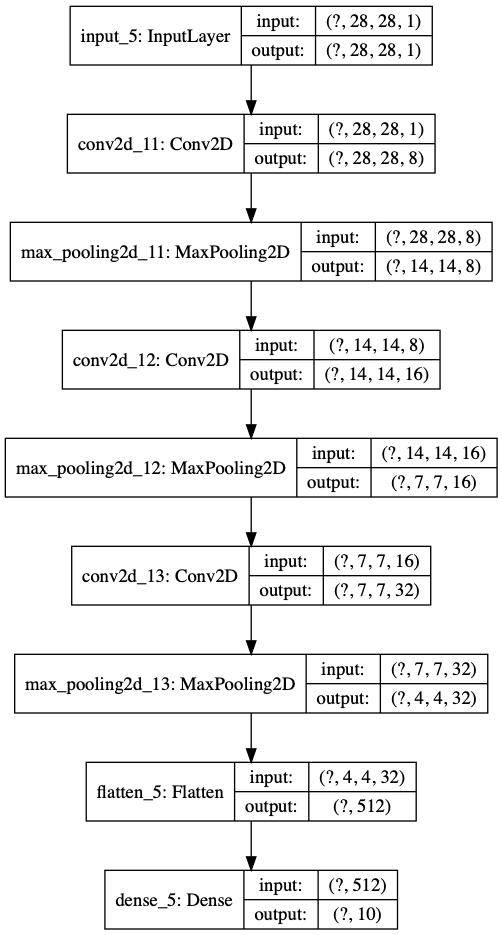

In [20]:
input_img = Input(shape=(28, 28, 1))

x = Conv2D(8, (3, 3), activation='relu', padding='same')(input_img)
x = MaxPooling2D((2, 2), padding='same')(x)
x = Conv2D(16, (3, 3), activation='relu', padding='same')(x)
x = MaxPooling2D((2, 2), padding='same')(x)
x = Conv2D(32, (3, 3), activation='relu', padding='same')(x)
x = MaxPooling2D((2, 2), padding='same')(x)
x = Flatten()(x)
out = Dense(10, activation='softmax')(x)

cnn = Model(input_img, out)
cnn.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

tf.keras.utils.plot_model(cnn, show_shapes=True)

In [21]:
import matplotlib.pyplot as plt

EPOCHS = 2
BATCH_SIZE = 32
STEPS_EPOCH = len(x_train) / BATCH_SIZE
history = cnn.fit_generator(datagen.flow(x_train, Y_train, batch_size=BATCH_SIZE),
                  shuffle=True,
                  validation_data=datagen.flow(x_test, Y_test, batch_size=BATCH_SIZE),
                  steps_per_epoch=STEPS_EPOCH, epochs=EPOCHS).history

Epoch 1/2
1875/1875 [==============================] - 43s 23ms/step - loss: 0.5999 - accuracy: 0.8074 - val_loss: 0.5495 - val_accuracy: 0.9244
Epoch 2/2
1875/1875 [==============================] - 44s 23ms/step - loss: 0.2483 - accuracy: 0.9248 - val_loss: 0.1642 - val_accuracy: 0.9395


# Pitasi

In [34]:
from ipycanvas import Canvas
from math import pi

import ipywidgets as widgets
from IPython.display import display
button = widgets.Button(description="Clear")
output = widgets.Output()

display(button, output)

def on_button_clicked(b):
    canvas.clear()
    
canvas = Canvas(size=(420, 420), sync_image_data=True)

def handle_mouse_move(x, y):
    global mouse_down
    if mouse_down:
        canvas.fill_style = 'black'
        canvas.stroke_style = 'black'
        canvas.fill_arc(x, y, 2, 0, 2 * pi)

def handle_mouse_down(x, y):
    global mouse_down
    mouse_down = True

def handle_mouse_up(x, y):
    global mouse_down
    mouse_down = False

canvas.on_mouse_move(handle_mouse_move)
canvas.on_mouse_down(handle_mouse_down)
canvas.on_mouse_up(handle_mouse_up)

button.on_click(on_button_clicked)

canvas

Button(description='Clear', style=ButtonStyle())

Output()

AttributeError: 'Canvas' object has no attribute 'height'

3


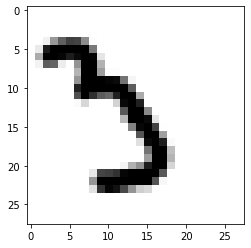

In [30]:
import cv2
import matplotlib.pyplot as plt
    
arr1 = canvas.get_image_data()
usample = cv2.resize(arr1, dsize=(28, 28), interpolation=cv2.INTER_AREA) / 255 

plt.imshow(usample)

usample = np.apply_along_axis(lambda x: max(x), 2, usample)
prediction = cnn.predict(usample.reshape(1,28,28,1))
print(np.argmax(prediction[0]))